In [124]:
# import seaborn as snsf
from __future__ import print_function, division
from scipy.stats import circmean, circstd
from fakespikes.util import create_psd
from pykdf.kdf import load_kdf
from bw.util import fit_gaussian
from scipy.signal import welch
%matplotlib inline
from brian2 import *

# EI populations

## Increasing drive in a single population.

In [125]:
%run ../ie.py ie -t 3 -p 1 -q 1 --sigma .01

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.12s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in < 1s


[ 2.35230865]


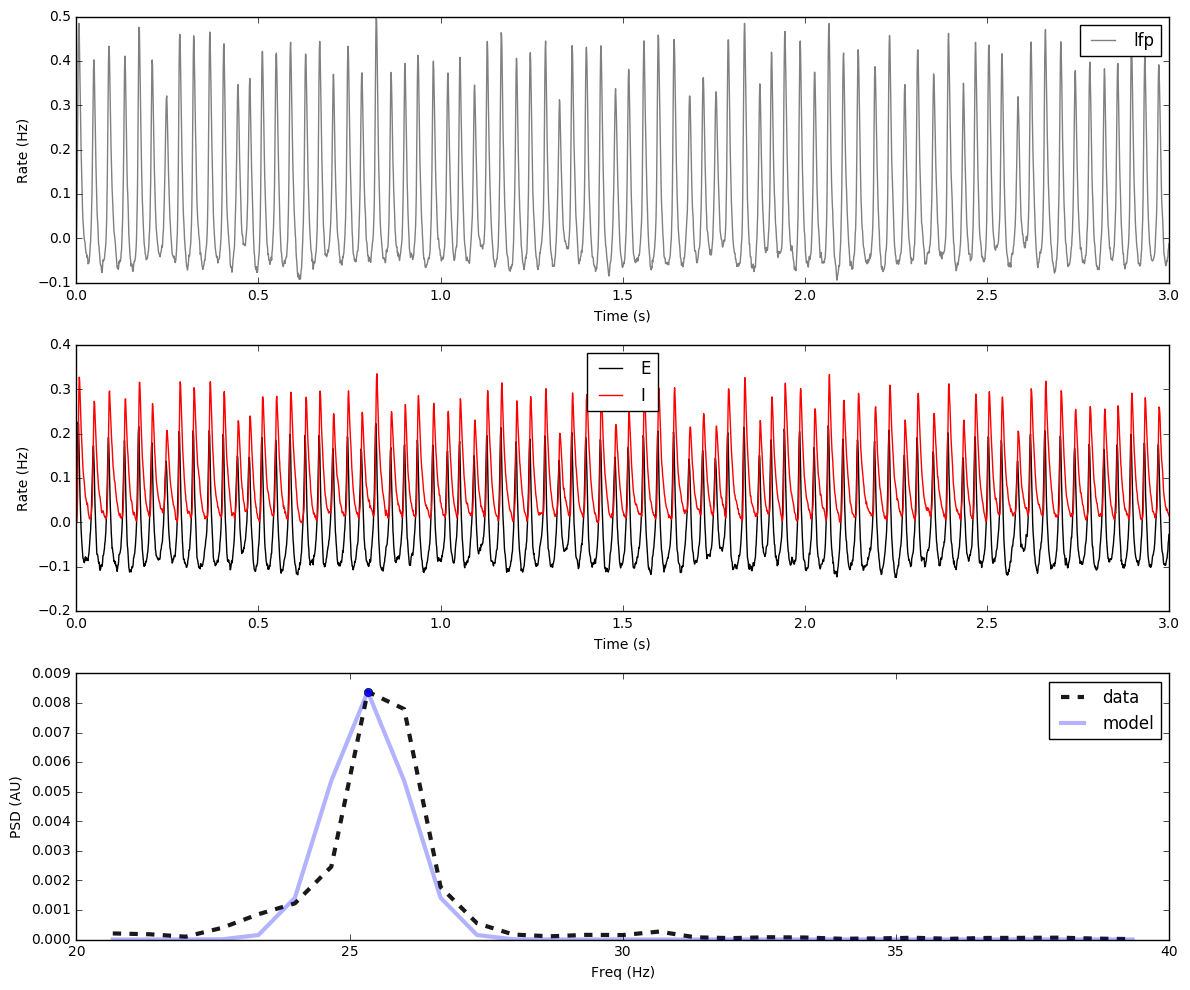

In [198]:
res = load_kdf('ie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
# Make and fit PSD
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000/2)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-3)
print(stdevs*2.355)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.9)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
# plt.semilogy()
plt.tight_layout()

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


[ 0.15022381  0.02355     0.66696128  0.38179769  0.49876758  0.86094724
  0.02355   ]


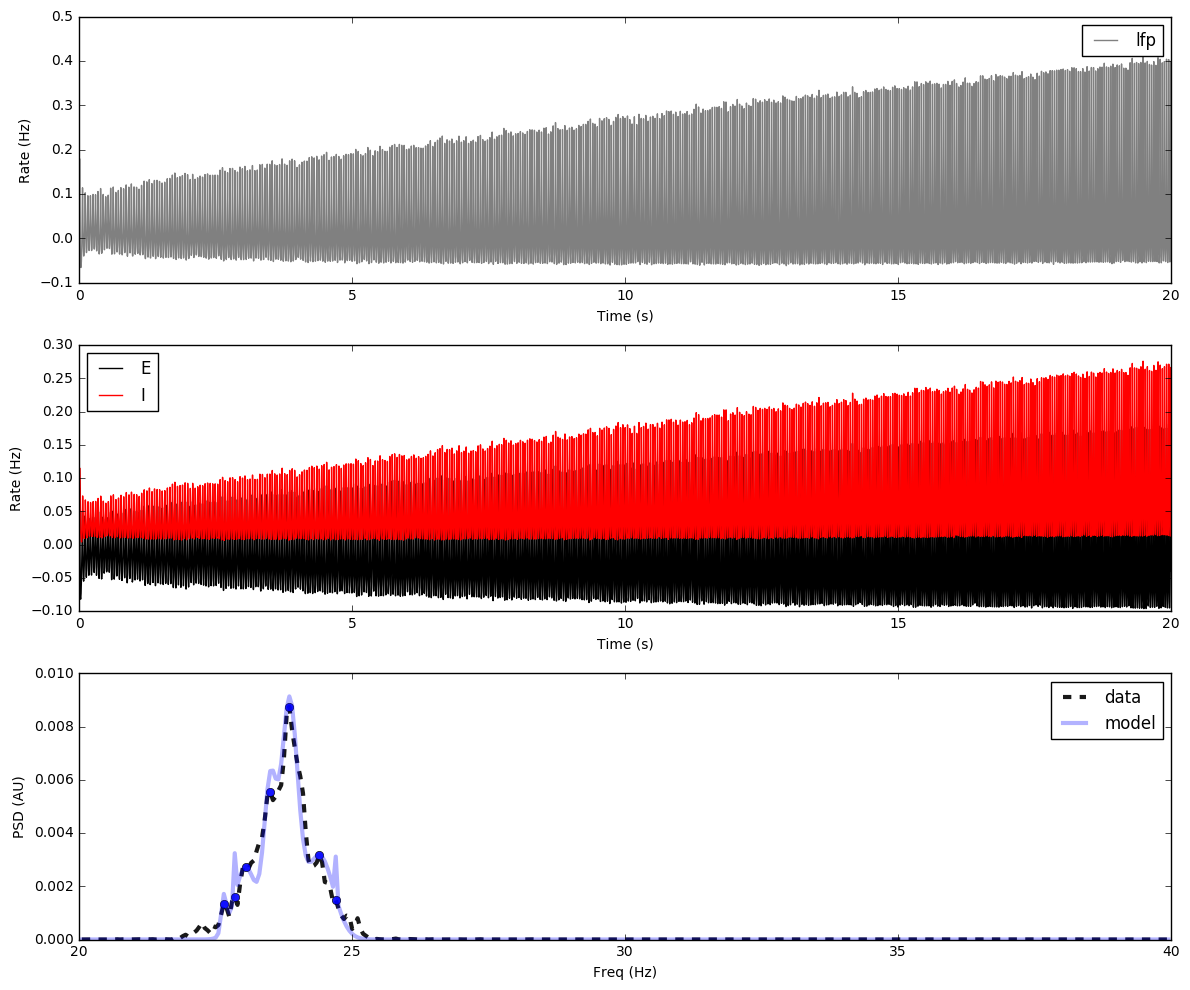

In [260]:
%run ../slidie.py slidie -t 20 --p0 0.5 --pn 1 --sigma .001

# -
res = load_kdf('slidie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
# xlim(8, 12)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
# xlim(8, 12)

# - 
# Make and fit PSD
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=20000)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-3)
print(stdevs*2.355)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.9)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
# plt.semilogy()
plt.tight_layout()

## Many populations with random drives (frequencies).

In [139]:
%run ../mixie.py mixie -n 10 -p 2 -q 1 -s 0.5 --dt 1e-3 --seed 10 --sigma .01

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for gro

[ 0.7985161   0.86257801  1.82170967  0.67182297  0.95753761  0.94180555
  0.82875415  0.8629161   0.56809413  0.90740513  1.83437084  1.1731219 ]


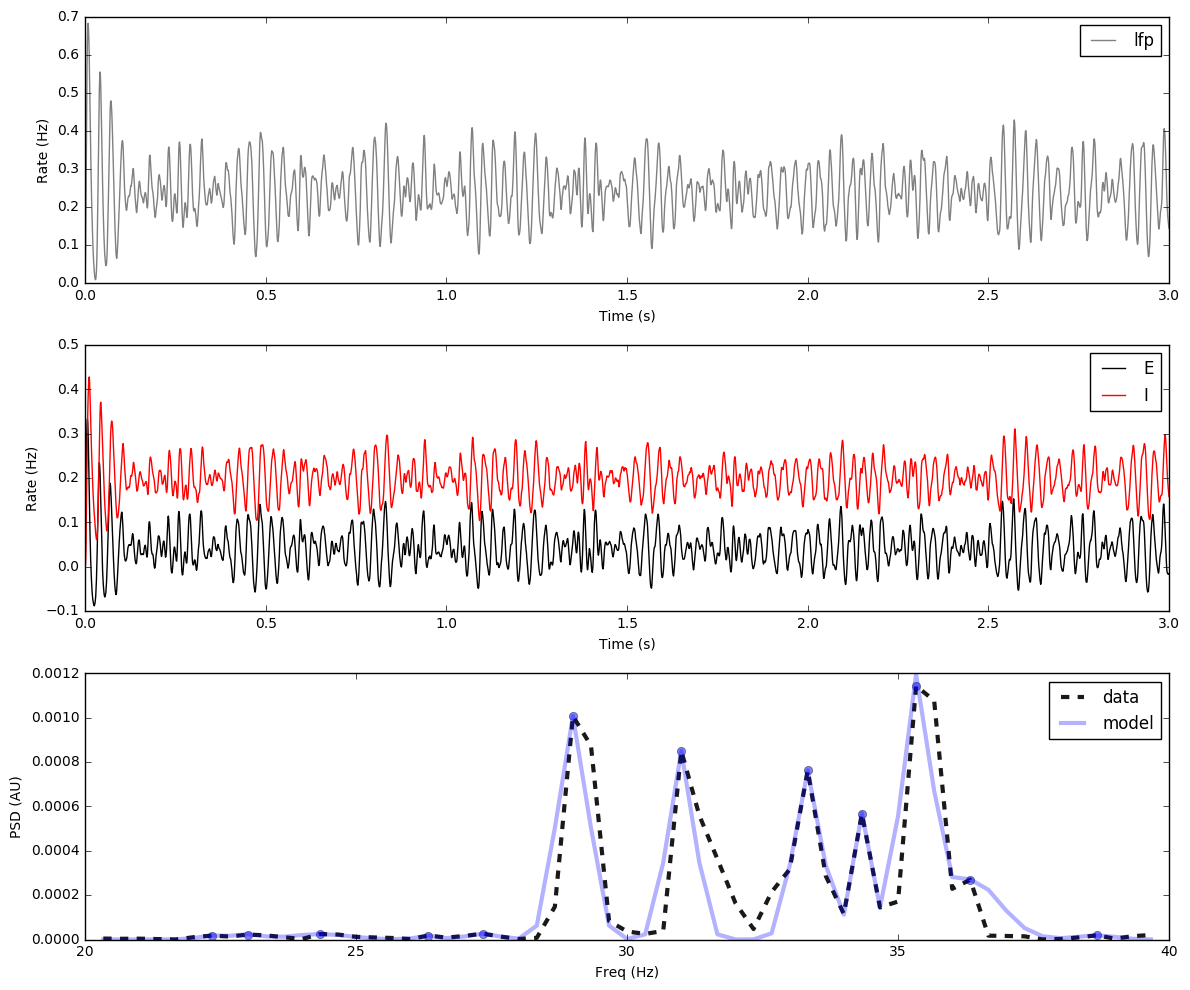

In [140]:
res = load_kdf('mixie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# - 
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-5)

print(stdevs*2.355)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

## Bursting

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


[ 1.89206521  3.64396837  2.17651167  3.34867605  2.19557022  3.88699122]


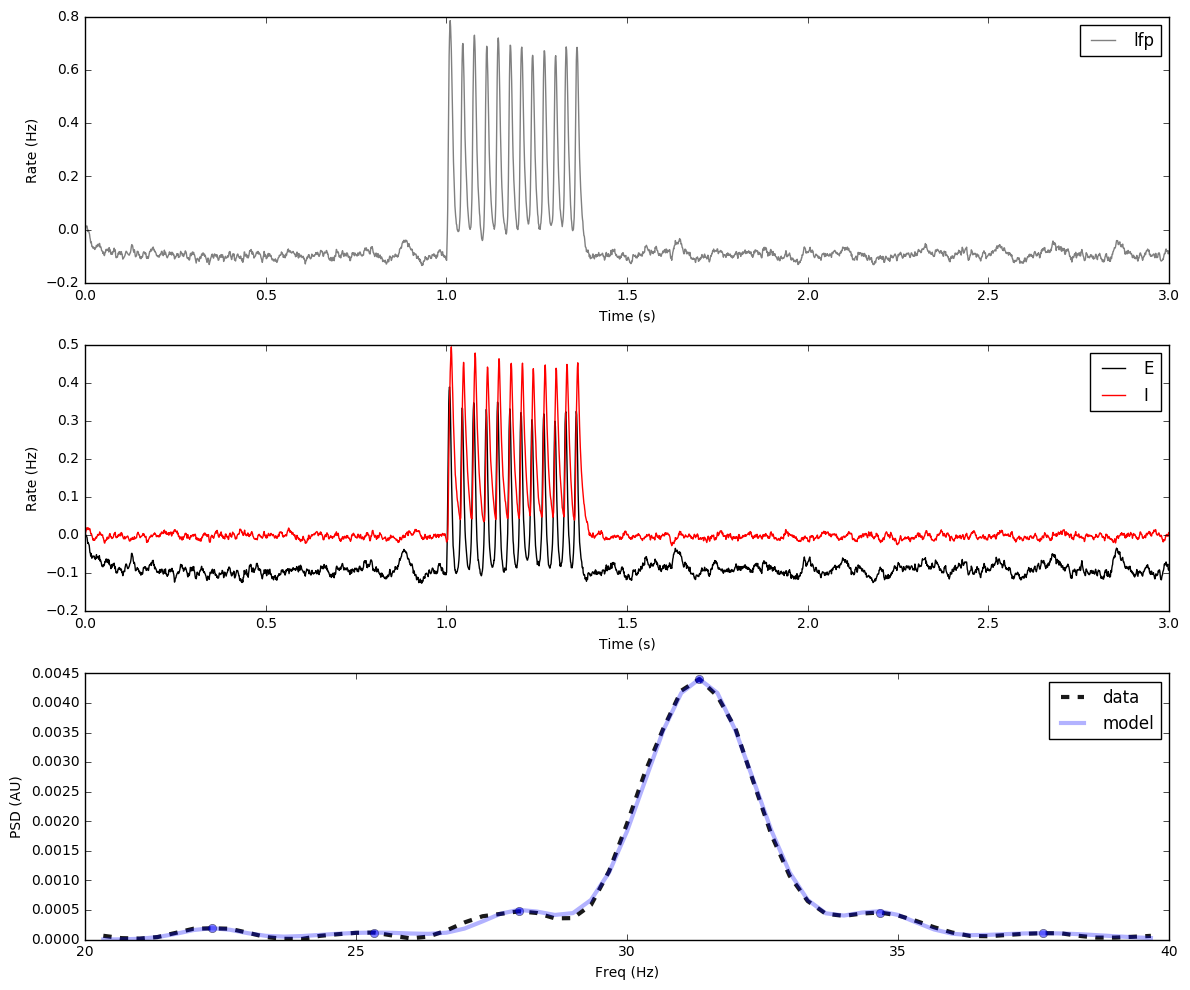

In [143]:
%run ../burstie.py burstie -w 0.5 -s 1 --sigma 0.01
res = load_kdf('burstie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-5)

print(stdevs*2.355)


# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

## Drifting

In [193]:
%run ../driftie.py driftie -t 300 -d .005 --min_P 0.5 
res = load_kdf('driftie.hdf5')

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


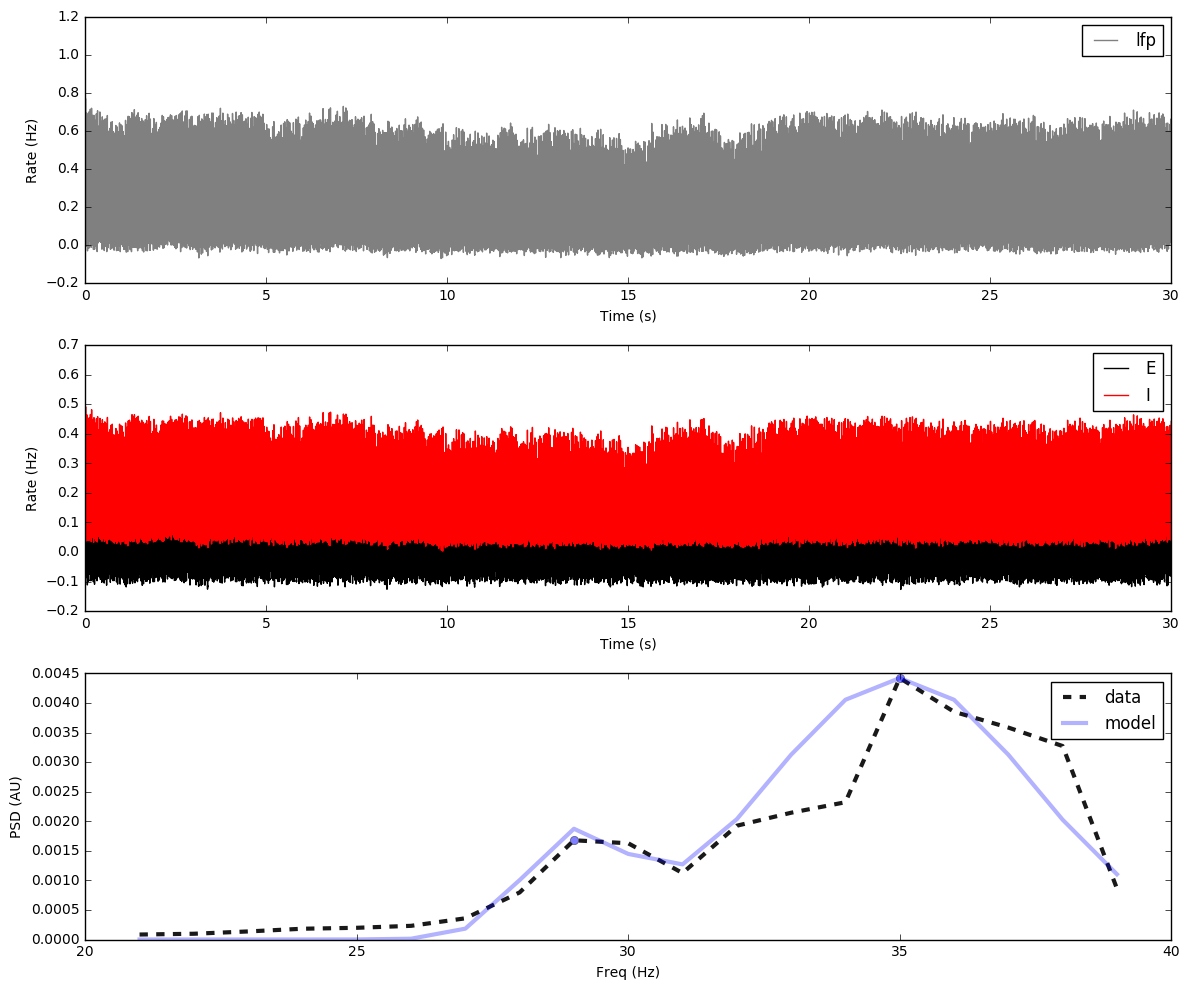

In [197]:
# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 30)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 30)

# - 
# Make and fit PSD
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=1000)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-3)
# print(stdevs*2.355)


# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

# Coupled oscillators

In [170]:
%run ../kur.py kur -t 3 -n 10 -k 6 -o 25 -r 3 --sigma .0001

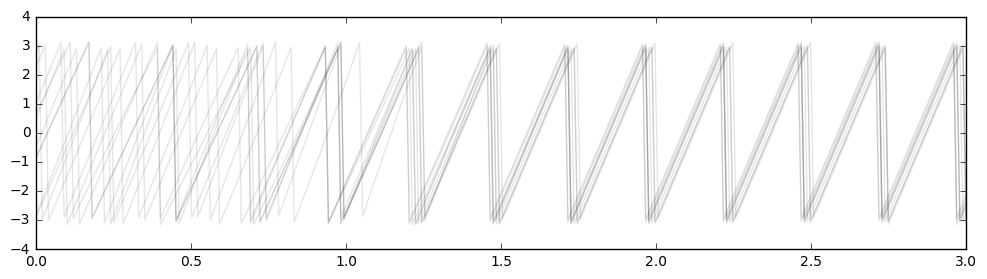

In [171]:
res = load_kdf('kur.hdf5')
times = res['times']

thetas = res['thetas']
lfp = res['lfp']
waves = res['waves']

figure(figsize=(12, 3))
plot(times, thetas, color='k', alpha=0.1);

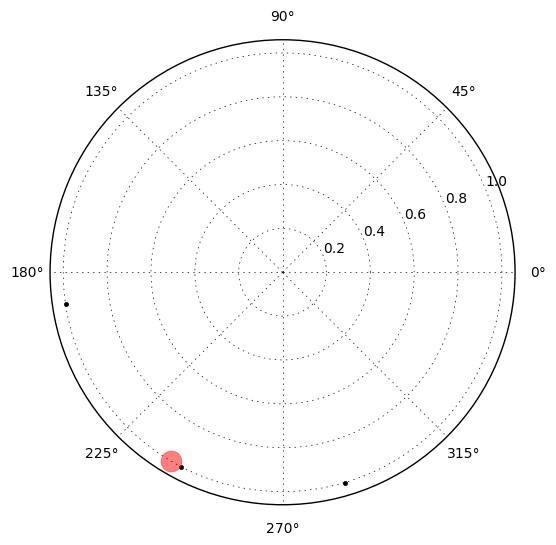

In [159]:
mTheta = circmean(thetas[times > 1, :], axis=0)
r = np.ones_like(mTheta)  # Unit vectors

figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(mTheta, r, '.k')
ax.plot(circmean(mTheta), 1, '.r', markersize=30, alpha=0.5)

In [134]:
# Now sample the avg theta and simulate sin waves with that property, 
# each at freq range defined in the K model
# Use this to create a LFP, and PSD

The oscillator frequencies are [ 24.24724071  27.70428584  26.39196365  25.59195091  22.93611184
  22.93596712  22.34850167  27.19705687  25.60669007  26.24843547]


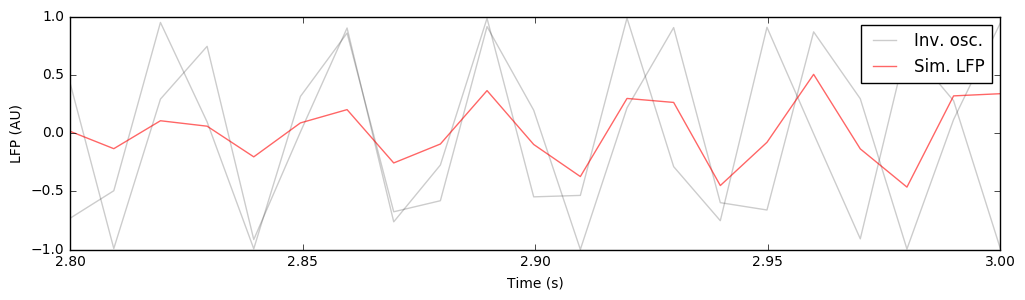

In [178]:
figure(figsize=(12, 3))
for n in range(res['N'])[:2]:
    wave = waves[n, :]
    if n == 0:
        plt.plot(times, wave, color='k', alpha=0.2, label='Inv. osc.')
    else:
        plt.plot(times, wave, color='k', alpha=0.2)

plt.plot(times, lfp, 'r', alpha=0.6, label='Sim. LFP')
plt.xlabel("Time (s)")
plt.ylabel("LFP (AU)")
plt.legend()
plt.xlim(2.8, 3)
print("The oscillator frequencies are", res['omegas'])

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 1000, is greater than input length = 300, using nperseg = 300
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))
 [py.warnings]


[ 0.86177551  0.68085027  0.80069885  0.02391547  1.34770549]


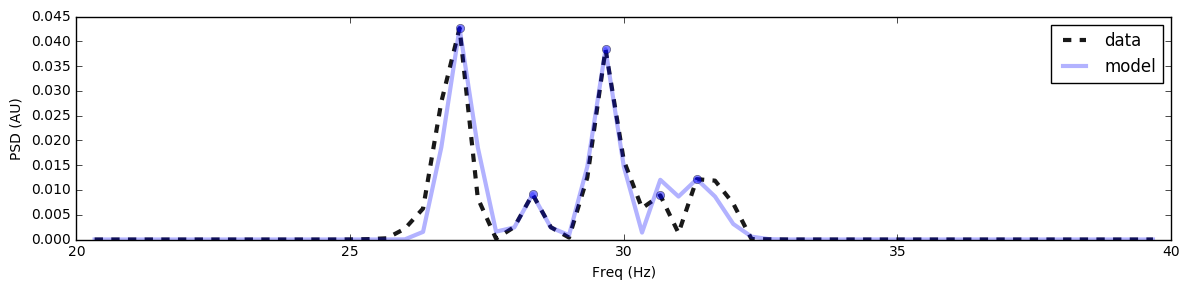

In [179]:
# - 
# Make and fit PSD
fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=1000)

m = np.logical_and(fs > 20, fs < 40)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd, 20, mph=1e-3)

print(stdevs*2.355)

# -
figure(figsize=(12, 3))
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()